In [1]:
#Noisy data 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
#For each camera, we extract the videos from the mat files
Mat1 = scipy.io.loadmat('/Users/nadaelarabi/MATH-494/M494H2/cam1_2.mat')
dataMat1 = Mat1["vidFrames1_2"]

In [7]:
Mat2 = scipy.io.loadmat('/Users/nadaelarabi/MATH-494/M494H2/cam2_2.mat')
dataMat2 = Mat2["vidFrames2_2"]

In [8]:
Mat3 = scipy.io.loadmat('/Users/nadaelarabi/MATH-494/M494H2/cam3_2.mat')
dataMat3 = Mat3["vidFrames3_2"]

In [9]:
#We need to determine the dimensions of each of the camera to see what dimensions our data matrix should have
print("The dimensions of cam1's take are: ",dataMat1.shape," cam2's: ",dataMat2.shape," cam3's: ",dataMat3.shape)

The dimensions of cam1's take are:  (480, 640, 3, 314)  cam2's:  (480, 640, 3, 356)  cam3's:  (480, 640, 3, 327)


In [17]:
#We write the videos necessary to capture the motion from each camera
#We only need to change the dataMati and the name of the videos for each camera take, I wrote them out as 
#camera1, camera2, camera3
#Sometimes necessary to first write the filename as mp4 inside 'filename'
height, width,_,nbFrames = dataMat1.shape
codec_id = "mp4v" # ID for a video codec.
fourcc = cv.VideoWriter_fourcc(*codec_id)
filename = "/Users/nadaelarabi/MATH-494/M494H2/camera1Noise.mp4v"
out = cv.VideoWriter(filename, fourcc=fourcc, fps=20, frameSize=(width, height))


for i in range(nbFrames):
    out.write(dataMat1[:,:,:,i])

In [29]:
#Here we declare the matrix that will store our x and y coordinates
x_y_coordinateMatrix = np.zeros((0,313))

In [55]:
#Now we can set up the motion tracking 

#First, we begin by setting up a dictionary of legacy motion trackers in opencv
TrDict = {
    'csrt' : cv.legacy.TrackerCSRT_create,
    'mosse' : cv.legacy.TrackerMOSSE_create,
    'kcf' : cv.legacy.TrackerKCF_create,
    'medianflow': cv.legacy.TrackerMedianFlow_create,
    'mil' : cv.legacy.TrackerMIL_create,
    'tld' : cv.legacy.TrackerTLD_create,
    'boosting' : cv.legacy.TrackerBoosting_create
}

In [56]:
#Now we initialize the tracker, csrt was chosen after testing with the other trackers and was found to be the best
tracker = TrDict['csrt']()

In [57]:
#The code below allows us to manually draw a rectangle that will track the motion of the bucket
#Recommended to draw a larger box as it makes it less susceptible to be thown off 

v = cv.VideoCapture('camera3Noise.mp4')
ret, frame = v.read()
cv.imshow('Frame',frame)
bb = cv.selectROI('Frame',frame)
tracker.init(frame,bb)
    

True

In [58]:
#Displaying and storing the coordinates into arrays
x_coordinates = np.zeros((356,1))
y_coordinates = np.zeros((356,1))
index = 0
while True:
    ret,frame = v.read()
    if not ret:
        break
    (success,box) = tracker.update(frame)
    if success:
        (x,y,w,h) = [int(a) for a in box]
        cv.rectangle(frame,(x,y),(x+w,y+h),(250,0,250), 2)
        x_centerCoordinate = (x+w)/2
        y_centerCoordinate = (y+h)/2
        print(x_centerCoordinate,y_centerCoordinate)
        x_coordinates[index] = x_centerCoordinate
        y_coordinates[index] = y_centerCoordinate
    cv.imshow('Frame',frame)
    key = cv.waitKey(30)
    index = index+1
    if key == ord('q'):
        break

v.release()
cv.destroyAllWindows()

220.5 164.0
224.0 164.0
223.5 164.0
228.0 164.5
227.0 163.0
236.0 165.0
234.5 163.5
243.0 165.5
242.0 164.0
246.5 163.0
246.5 163.0
251.5 164.5
250.5 163.5
253.5 165.0
252.0 162.5
253.5 164.0
253.0 163.0
251.0 164.0
250.5 164.0
251.0 168.0
250.5 168.0
249.5 169.5
249.0 169.5
244.0 169.0
244.0 168.5
233.5 168.0
232.5 166.5
233.0 168.0
221.5 168.0
221.5 168.0
217.5 168.5
218.0 169.0
213.5 167.5
213.5 167.5
206.5 166.0
206.0 165.5
206.0 165.0
206.0 165.5
209.5 164.5
209.0 164.5
210.5 164.0
210.5 163.0
214.0 163.5
213.5 163.5
220.5 164.5
221.0 164.5
231.0 164.0
230.0 163.5
239.5 164.0
238.5 162.5
248.5 163.0
250.0 164.0
258.0 166.5
257.5 166.5
260.5 165.0
260.0 164.5
253.5 161.5
253.5 161.0
253.5 157.0
254.0 157.5
252.0 160.5
252.0 160.0
246.5 160.5
247.0 160.5
240.5 163.0
240.0 162.5
234.0 161.5
234.0 161.5
228.5 162.0
228.5 162.5
225.5 164.0
225.5 164.0
220.5 162.5
220.0 162.0
207.5 157.0
208.5 158.5
202.0 158.0
201.5 158.0
208.5 156.5
209.0 156.0
214.0 156.0
214.0 156.0
219.5 160.0
219.

In [59]:
#Here we will resize our coordinate arrays so that they are an appropriate shape
#Since the camera take with the fewest number of frames generates 225 data points, 
x_coordinates = np.resize(x_coordinates,(313,1))
y_coordinates = np.resize(y_coordinates,(313,1))

In [60]:
#Now we can reshape the coordinates to make them one long row
x_coordinates = np.reshape(x_coordinates,(1,313))
y_coordinates = np.reshape(y_coordinates,(1,313))

In [61]:
np.shape(x_y_coordinateMatrix)

(4, 313)

In [62]:
x_y_coordinateMatrix = np.append(x_y_coordinateMatrix,x_coordinates,axis=0)

In [63]:
x_y_coordinateMatrix = np.append(x_y_coordinateMatrix,y_coordinates,axis=0)

In [64]:
np.shape(x_y_coordinateMatrix)

(6, 313)

In [65]:
x_y_coordinateMatrix

array([[200. , 200. , 200.5, ..., 219.5, 219.5, 219.5],
       [201.5, 201.5, 201.5, ..., 181.5, 180.5, 180.5],
       [192. , 185. , 176.5, ..., 189. , 189. , 196. ],
       [229.5, 229.5, 228.5, ..., 168. , 172. , 176.5],
       [220.5, 224. , 223.5, ..., 208.5, 208. , 204. ],
       [164. , 164. , 164. , ..., 143.5, 143.5, 143.5]])

In [66]:
np.save('x_y_coordinateMatrixNOISE',x_y_coordinateMatrix)

In [67]:
#Here we import the data matrix
x_y_coordinatesMat = np.load('/Users/nadaelarabi/MATH-494/M494H2/x_y_coordinateMatrixNOISE.npy')

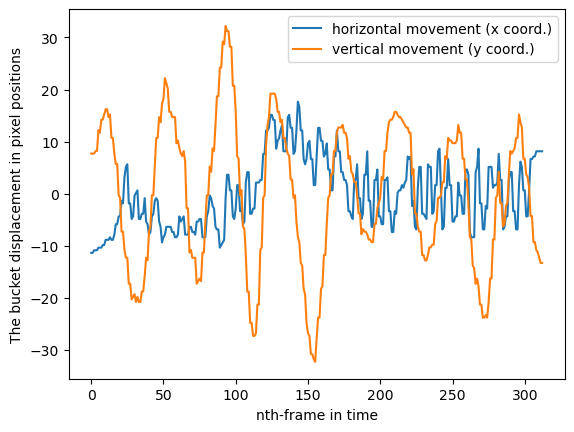

In [72]:
plt.plot(x_y_coordinatesMat[0,:], label = "horizontal movement (x coord.)")
plt.plot(x_y_coordinatesMat[1,:],label = "vertical movement (y coord.)")
#plt.title('Displacement with respect to original coordinate position, 1st camera, minimal noise')
plt.xlabel('nth-frame in time')
plt.ylabel('The bucket displacement in pixel positions')
plt.legend()

plt.savefig('Displ_camera1_NOISE.png')


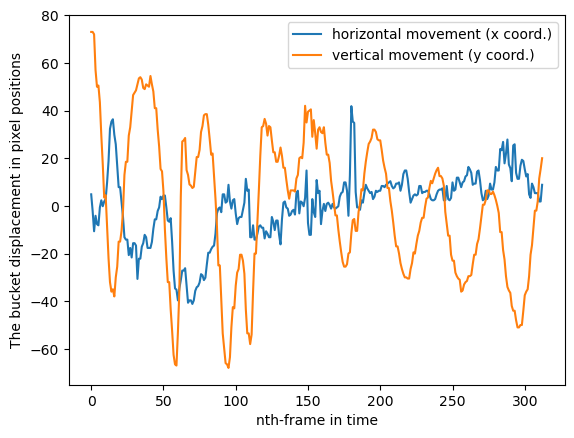

In [73]:
plt.plot(x_y_coordinatesMat[2,:],label = "horizontal movement (x coord.)")
plt.plot(x_y_coordinatesMat[3,:],label = "vertical movement (y coord.)")
#plt.title('Displacement with respect to original coordinate position, 2nd camera, minimal noise')
plt.xlabel('nth-frame in time')
plt.ylabel('The bucket displacement in pixel positions')
plt.legend()

plt.savefig('Displ_camera2_NOISE.png')

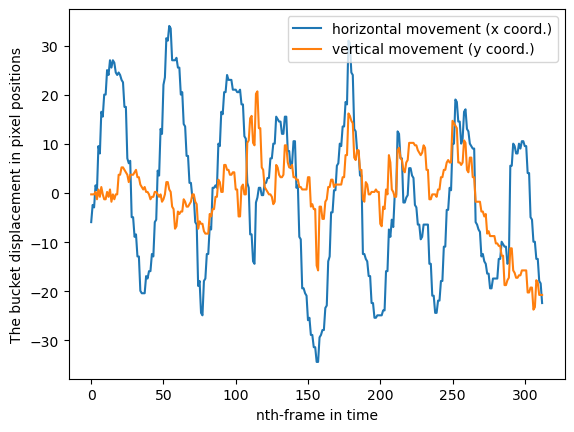

In [74]:
plt.plot(x_y_coordinatesMat[4,:],label = "horizontal movement (x coord.)")
plt.plot(x_y_coordinatesMat[5,:],label = "vertical movement (y coord.)")
#plt.title('Displacement with respect to original coordinate position, 3rd camera, minimal noise')
plt.xlabel('nth-frame in time')
plt.ylabel('The bucket displacement in pixel positions')
plt.legend()
plt.savefig('Displ_camera3_NOISE.png')

In [71]:
#Let's try to compute the mean a bit differently
row1_x = x_y_coordinatesMat[0,:]
row1_y = x_y_coordinatesMat[1,:]
row2_x = x_y_coordinatesMat[2,:]
row2_y = x_y_coordinatesMat[3,:]
row3_x = x_y_coordinatesMat[4,:]
row3_y = x_y_coordinatesMat[5,:]

mean_x1 = np.mean(row1_x)
mean_y1 = np.mean(row1_y)
mean_x2 = np.mean(row2_x)
mean_y2 = np.mean(row2_y)
mean_x3 = np.mean(row3_x)
mean_y3 = np.mean(row3_y)

x_y_coordinatesMat[0,:] = x_y_coordinatesMat[0,:] - mean_x1
x_y_coordinatesMat[1,:] = x_y_coordinatesMat[1,:] - mean_y1
x_y_coordinatesMat[2,:] = x_y_coordinatesMat[2,:] - mean_x2
x_y_coordinatesMat[3,:] = x_y_coordinatesMat[3,:] - mean_y2
x_y_coordinatesMat[4,:] = x_y_coordinatesMat[4,:] - mean_x3
x_y_coordinatesMat[5,:] = x_y_coordinatesMat[5,:] - mean_y3

x_y_coordinatesMat

array([[-11.34984026, -11.34984026, -10.84984026, ...,   8.15015974,
          8.15015974,   8.15015974],
       [  7.71405751,   7.71405751,   7.71405751, ..., -12.28594249,
        -13.28594249, -13.28594249],
       [  4.87539936,  -2.12460064, -10.62460064, ...,   1.87539936,
          1.87539936,   8.87539936],
       [ 73.02715655,  73.02715655,  72.02715655, ...,  11.52715655,
         15.52715655,  20.02715655],
       [ -5.92332268,  -2.42332268,  -2.92332268, ..., -17.92332268,
        -18.42332268, -22.42332268],
       [ -0.26517572,  -0.26517572,  -0.26517572, ..., -20.76517572,
        -20.76517572, -20.76517572]])

In [75]:
u,s,vt = np.linalg.svd(x_y_coordinatesMat)

In [76]:
ut = u.transpose()

In [77]:
Y = np.matmul(ut,x_y_coordinatesMat)

In [78]:
covarianceMat_Y = np.cov(Y)

In [79]:
covarianceMat_Y

array([[ 1.09082442e+03,  1.57412545e-13,  3.78956126e-14,
        -1.45752356e-14,  9.61965550e-14,  9.76540786e-14],
       [ 1.57412545e-13,  2.54544218e+02, -2.83488333e-13,
        -2.62354241e-14,  7.28761780e-15, -3.93531361e-14],
       [ 3.78956126e-14, -2.83488333e-13,  1.67044053e+02,
        -2.87860903e-14, -1.91299967e-14, -9.38280792e-15],
       [-1.45752356e-14, -2.62354241e-14, -2.87860903e-14,
         7.47898589e+01,  1.60327592e-14, -1.45752356e-14],
       [ 9.61965550e-14,  7.28761780e-15, -1.91299967e-14,
         1.60327592e-14,  4.57483470e+01, -4.51832304e-14],
       [ 9.76540786e-14, -3.93531361e-14, -9.38280792e-15,
        -1.45752356e-14, -4.51832304e-14,  3.79510584e+01]])

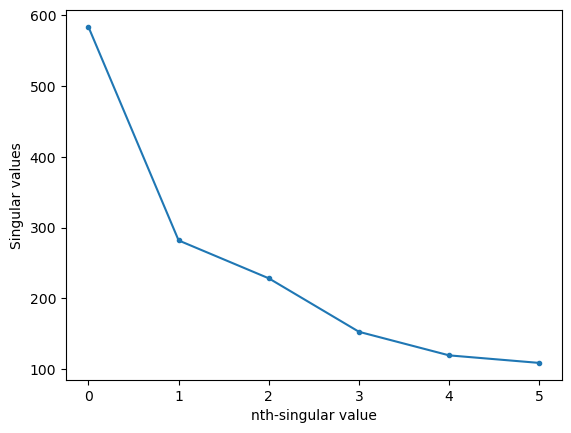

In [80]:
#We can plot the singular values
plt.plot(s,marker='.')
plt.xlabel('nth-singular value')
plt.ylabel('Singular values')
#plt.title('Plot of singular values of minimal noise data')
plt.savefig('svNOISE.png')

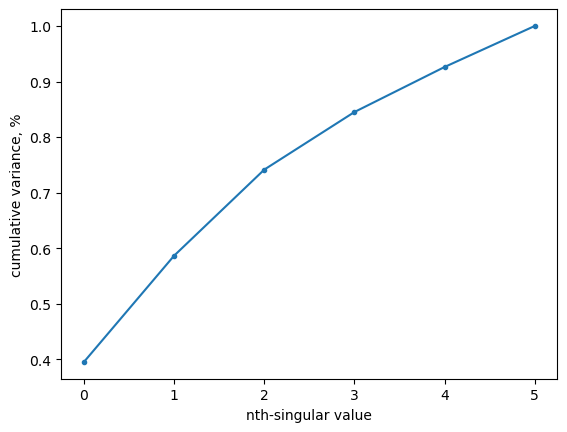

In [81]:
plt.plot(np.cumsum(s)/np.sum(s), marker='.')
plt.xlabel('nth-singular value')
plt.ylabel('cumulative variance, %')
#plt.title('Cumulative sum of variance captured by first nth-singular vectors ')
plt.savefig('svCumulativeNOISE.png')

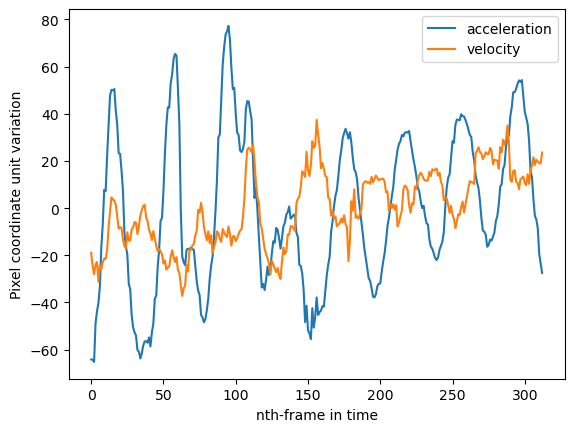

In [82]:
plt.plot(s[0]*vt[0,:], label = 'acceleration')
plt.plot(s[1]*vt[1,:], label = 'velocity')
plt.xlabel('nth-frame in time')
plt.ylabel('Pixel coordinate unit variation')
#plt.title('Evolution of acceleration and velocity in time')
plt.legend()
plt.savefig('avNOISE.png')



#Note that the blue curve is acceleration and the orange curve is its derivative, velocity
#s[0]*vt[0,:], s[1]*vt[1,:]

In [83]:
import pysindy as ps
x_y_coordinatesMat

array([[-11.34984026, -11.34984026, -10.84984026, ...,   8.15015974,
          8.15015974,   8.15015974],
       [  7.71405751,   7.71405751,   7.71405751, ..., -12.28594249,
        -13.28594249, -13.28594249],
       [  4.87539936,  -2.12460064, -10.62460064, ...,   1.87539936,
          1.87539936,   8.87539936],
       [ 73.02715655,  73.02715655,  72.02715655, ...,  11.52715655,
         15.52715655,  20.02715655],
       [ -5.92332268,  -2.42332268,  -2.92332268, ..., -17.92332268,
        -18.42332268, -22.42332268],
       [ -0.26517572,  -0.26517572,  -0.26517572, ..., -20.76517572,
        -20.76517572, -20.76517572]])

In [84]:
x_y_coordinates_reduced = (u[:,0:2].transpose())@x_y_coordinatesMat

In [85]:
x_y_coordinates_reduced.shape

(2, 313)

In [86]:
x_y_coordinates_reduced = x_y_coordinates_reduced.transpose()

In [87]:
x = x_y_coordinates_reduced[:,0]
y = x_y_coordinates_reduced[:,1]

In [88]:
featureNames = ['x','y']

In [101]:
opt = ps.STLSQ(threshold = 0.1)

In [102]:
model = ps.SINDy(feature_names = featureNames,optimizer = opt)

In [103]:
model.fit(x_y_coordinates_reduced,t = 15/314)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['x', 'y'],
      optimizer=STLSQ())

In [104]:
model.print()

(x)' = 2.338 1 + -1.222 y
(y)' = 2.909 1 + 0.174 x
